In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('manufacturing.csv')
df = pd.DataFrame(df)
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [24]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [25]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [26]:
corr = df.corr()
corr['Quality Rating'].sort_values(ascending=False)

Quality Rating                    1.000000
Pressure (kPa)                    0.013129
Temperature x Pressure           -0.258474
Temperature (°C)                 -0.461279
Material Fusion Metric           -0.511972
Material Transformation Metric   -0.575756
Name: Quality Rating, dtype: float64

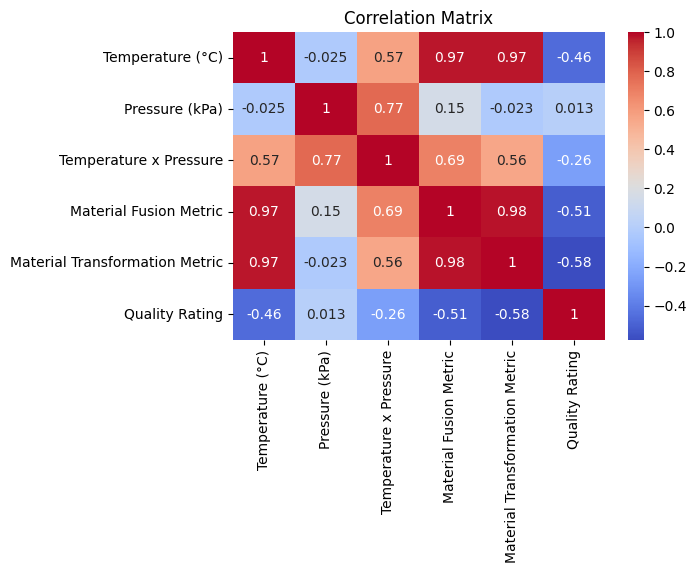

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Multiple Linear Regression -> MSE: 99.1026, R2: 0.5146


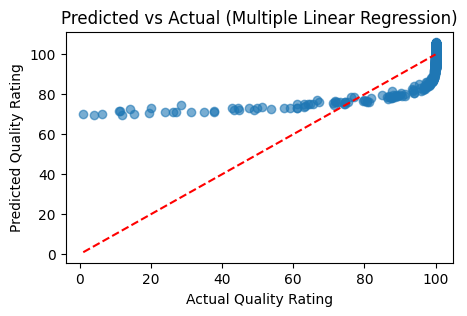

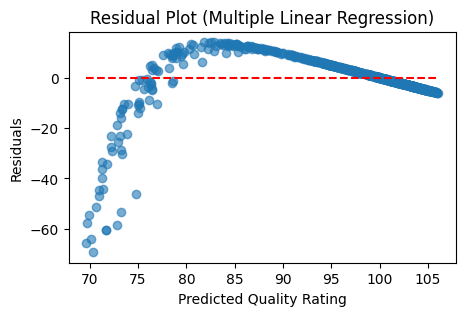

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
        'Material Fusion Metric', 'Material Transformation Metric']]
y = df['Quality Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Multiple Linear Regression -> MSE: {mse:.4f}, R2: {r2:.4f}")

# -----------------------------
# Plot Predicted vs Actual
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect fit line
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.show()

# -----------------------------
# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(5,3))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--')
plt.xlabel("Predicted Quality Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot (Multiple Linear Regression)")
plt.show()

Polynomial Regression (degree=2) -> MSE: 0.2986, R2: 0.9985


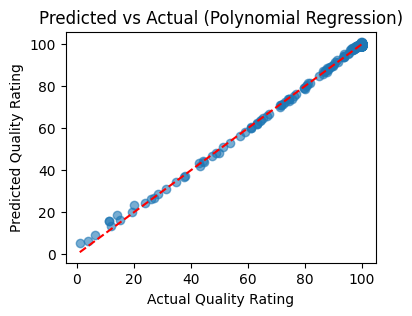

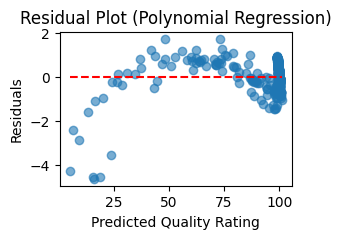

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
        'Material Fusion Metric', 'Material Transformation Metric']]
y = df['Quality Rating']

# Polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=7, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)
y_pred_poly = poly_lr.predict(X_test)

# Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (degree=2) -> MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")

# -----------------------------
# Predicted vs Actual Plot
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect fit line
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Predicted vs Actual (Polynomial Regression)")
plt.show()

# -----------------------------
# Residual Plot
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(3,2))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_poly.min(), xmax=y_pred_poly.max(), color='red', linestyle='--')
plt.xlabel("Predicted Quality Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()


Polynomial Regression after removing outliers -> MSE: 0.0000, R2: 0.9983


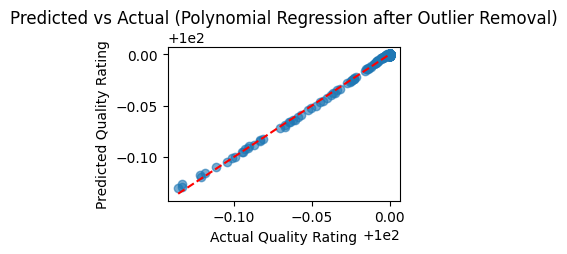

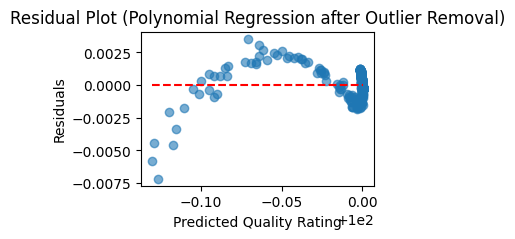

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
features = ['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
            'Material Fusion Metric', 'Material Transformation Metric']
X = df[features]
y = df['Quality Rating']

# -----------------------------
# Outlier removal using IQR for each feature
df_clean = df.copy()
for col in features + ['Quality Rating']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

X_clean = df_clean[features]
y_clean = df_clean['Quality Rating']


poly = PolynomialFeatures(degree=7, include_bias=False)
X_poly = poly.fit_transform(X_clean)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_clean, test_size=0.2, random_state=42)

# Train Polynomial Regression
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)
y_pred_poly = poly_lr.predict(X_test)

# Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression after removing outliers -> MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")


# Predicted vs Actual Plot
plt.figure(figsize=(3,2))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y_clean.min(), y_clean.max()], [y_clean.min(), y_clean.max()], color='red', linestyle='--')
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Predicted vs Actual (Polynomial Regression after Outlier Removal)")
plt.show()


# Residual Plot
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(3,2))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_poly.min(), xmax=y_pred_poly.max(), color='red', linestyle='--')
plt.xlabel("Predicted Quality Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression after Outlier Removal)")
plt.show()
